In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

### 2.4.3. 示例：美国总统的身高是多少

In [4]:
path = r"E:\Python\Python 数据科学手册\PythonDataScienceHandbook-master\notebooks\data"

data = pd.read_csv(f"{path}\president_heights.csv")
heights = np.array(data['height(cm)'])
heights

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185], dtype=int64)

In [6]:
np.argmin(heights)

3

In [12]:
x = np.zeros(10)

In [13]:
x[[0, 0]] = [4, 6]

In [14]:
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
i = [2, 3, 3, 4, 4, 4]

x[i] += 1

In [17]:
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [21]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

In [22]:
np.random.seed(42)
x = np.random.randn(100)

In [23]:
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

In [24]:
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [25]:
i = np.searchsorted(bins, x)

In [26]:
i

array([11, 10, 11, 13, 10, 10, 13, 11,  9, 11,  9,  9, 10,  6,  7,  9,  8,
       11,  8,  7, 13, 10, 10,  7,  9, 10,  8, 11,  9,  9,  9, 14, 10,  8,
       12,  8, 10,  6,  7, 10, 11, 10, 10,  9,  7,  9,  9, 12, 11,  7, 11,
        9,  9, 11, 12, 12,  8,  9, 11, 12,  9, 10,  8,  8, 12, 13, 10, 12,
       11,  9, 11, 13, 10, 13,  5, 12, 10,  9, 10,  6, 10, 11, 13,  9,  8,
        9, 12, 11,  9, 11, 10, 12,  9,  9,  9,  7, 11, 10, 10, 10],
      dtype=int64)

In [27]:
np.add.at(counts, i, 1)

In [30]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [31]:
x = np.zeros(4, dtype=int)

In [34]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
data.dtype

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [35]:
data['name'] = name
data['age'] = age
data['weight'] = weight

In [36]:
data

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

## 2.5 数组的计算：广播

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])

In [3]:
a + b

array([5, 6, 7])

In [4]:
a + b

array([5, 6, 7])

In [5]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [6]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

对两个数组的同时广播

In [7]:
a = np.arange(3)
b = np.arange(3)[ : , np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [8]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 2.5.2 广播的规则

- 如果两个数组的维度数不相同，那么小维度数组的形状将会在最左边补1
- 如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度为1的维度扩展以匹配另外一个数组的形状
- 如果两个数组的形状在任何一个维度上都不匹配并且没有一个维度等于1，那么会引发异常。

#### 1.广播示例1

In [10]:
M = np.ones((2, 3))
a = np.arange(3)

print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


In [11]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

#### 2.广播示例2

In [13]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


In [14]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### 3.广播示例3

In [15]:
M = np.ones((3, 2))
a = np.arange(3)

print(M)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


In [16]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [17]:
M + a[ : , np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

### 2.5.3 广播的实际应用

#### 1.数组的归一化

In [18]:
X = np.random.random((10, 3))

In [23]:
# axis = 0 : 沿着第一个维度聚合
Xmean = X.mean(axis=0)
Xmean

array([0.50246519, 0.26020299, 0.5700173 ])

In [25]:
# 归一化
X_centered = X - Xmean
X_centered

array([[-0.09215044, -0.07447798, -0.52224508],
       [ 0.16213   ,  0.01887398, -0.11198564],
       [-0.17973131, -0.13555397,  0.10903259],
       [ 0.08290455, -0.01890906, -0.06073208],
       [-0.49290648, -0.03451257,  0.42218687],
       [-0.38948764,  0.33406318,  0.33924338],
       [ 0.38578135,  0.16161004,  0.31727292],
       [-0.05788075, -0.06947747, -0.24733921],
       [ 0.3906304 , -0.07767669, -0.25062672],
       [ 0.19071033, -0.10393947,  0.00519297]])

In [28]:
X_centered.mean(axis=0)

array([2.22044605e-17, 2.22044605e-17, 8.88178420e-17])

#### 2.画一个二维函数

In [29]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[ : , np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

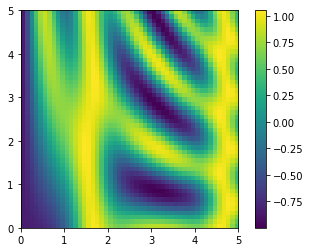

In [31]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();